In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newredditdata/COVID19Comments.csv
/kaggle/input/newredditdata/modernavaccineComments.csv
/kaggle/input/newredditdata/antivaxComments.csv
/kaggle/input/newredditdata/PfizerVaccine.csv
/kaggle/input/newredditdata/CovidVaccineComments.csv
/kaggle/input/newredditdata/CoronavirusComments.csv
/kaggle/input/newredditdata/COVID19.csv
/kaggle/input/newredditdata/PfizerVaccineComments.csv
/kaggle/input/newredditdata/CovidVaccine.csv
/kaggle/input/newredditdata/CovidVaccinated.csv
/kaggle/input/newredditdata/antivax.csv
/kaggle/input/newredditdata/VACCINESComments.csv
/kaggle/input/newredditdata/AntiVaxxersComments.csv
/kaggle/input/newredditdata/Coronavirus.csv
/kaggle/input/newredditdata/VACCINES.csv
/kaggle/input/newredditdata/AntiVaxxers.csv
/kaggle/input/newredditdata/modernavaccine.csv
/kaggle/input/newredditdata/CovidVaccinatedComments.csv
/kaggle/input/redditdatasetnew/COVID19Comments.csv
/kaggle/input/redditdatasetnew/modernavaccineComments.csv
/kaggle/input/redditdatasetne

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import re

import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px
import datetime
from datetime import datetime

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [35]:
csv_file_list = ["/kaggle/input/newredditdata/COVID19Comments.csv", "/kaggle/input/newredditdata/modernavaccineComments.csv", "/kaggle/input/newredditdata/antivaxComments.csv", "/kaggle/input/newredditdata/CovidVaccineComments.csv", "/kaggle/input/newredditdata/CoronavirusComments.csv", "/kaggle/input/newredditdata/PfizerVaccineComments.csv", "/kaggle/input/newredditdata/VACCINESComments.csv", "/kaggle/input/newredditdata/AntiVaxxersComments.csv", "/kaggle/input/newredditdata/CovidVaccinatedComments.csv"]

csv_reddit_files = ["/kaggle/input/newredditdata/PfizerVaccine.csv", "/kaggle/input/newredditdata/COVID19.csv", "/kaggle/input/newredditdata/CovidVaccine.csv", "/kaggle/input/newredditdata/CovidVaccinated.csv", "/kaggle/input/newredditdata/antivax.csv", "/kaggle/input/newredditdata/Coronavirus.csv", "/kaggle/input/newredditdata/VACCINES.csv", "/kaggle/input/newredditdata/AntiVaxxers.csv", "/kaggle/input/newredditdata/modernavaccine.csv"]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

df = pd.concat(list_of_dataframes)

list_of_title_dataframes = []
for filename in csv_reddit_files:
    list_of_title_dataframes.append(pd.read_csv(filename))

df_titles = pd.concat(list_of_dataframes)
df_title_csv = pd.concat(list_of_title_dataframes)

def tokenize(comment):
    for word in comment:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))  # deacc=True Removes punctuations

df['tidy_tokens'] = list(tokenize(df['comments']))

In [36]:
df_titles['date']
split_data_title = []
only_dates_title = []
dates_title = []
for data in df_titles['date']:
    split_data_title.append(data.split(" ")[:1])
    
for data in split_data_title:
    for value in data:
        only_dates_title.append(value)

for key in only_dates_title:
    values = datetime.strptime(key, '%Y-%m-%d').date()
    dates_title.append(values)


df_titles = df_titles.drop(columns=['date'])
df_titles.head()

df_titles['date'] = dates_title
df_titles.head()


,comments,id,date
0,**Please read before commenting or asking a qu...,np1rw6,2021-05-31
1,Are there studies comparing masked spread indo...,np1rw6,2021-05-31
2,I've recently read an article from the CBC tha...,np1rw6,2021-06-02
3,Did Johnson & Johnson ever release data from t...,np1rw6,2021-06-01
4,I think I saw a study somewhere suggesting tha...,np1rw6,2021-05-31


In [37]:
df['date']
split_data_titles = []
only_dates_titles = []
dates_titles = []
for data in df['date']:
    split_data_titles.append(data.split(" ")[:1])
    
for data in split_data_titles:
    for value in data:
        only_dates_titles.append(value)

for key in only_dates_titles:
    values = datetime.strptime(key, '%Y-%m-%d').date()
    dates_titles.append(values)


df = df.drop(columns=['date'])
df.head()

df['date'] = dates_titles
df.head()

,comments,id,tidy_tokens,date
0,**Please read before commenting or asking a qu...,np1rw6,"[please, read, before, commenting, or, asking,...",2021-05-31
1,Are there studies comparing masked spread indo...,np1rw6,"[are, there, studies, comparing, masked, sprea...",2021-05-31
2,I've recently read an article from the CBC tha...,np1rw6,"[ve, recently, read, an, article, from, the, c...",2021-06-02
3,Did Johnson & Johnson ever release data from t...,np1rw6,"[did, johnson, johnson, ever, release, data, f...",2021-06-01
4,I think I saw a study somewhere suggesting tha...,np1rw6,"[think, saw, study, somewhere, suggesting, tha...",2021-05-31


In [38]:
df_title_csv['date']
split_data = []
only_dates = []
dates = []
for data in df_title_csv['date']:
    split_data.append(data.split(" ")[:1])
    
for data in split_data:
    for value in data:
        only_dates.append(value)

for key in only_dates:
    values = datetime.strptime(key, '%Y-%m-%d').date()
    dates.append(values)


df_title_csv = df_title_csv.drop(columns=['date'])
df_title_csv.head()

df_title_csv['date'] = dates
df_title_csv.head()


,title,score,id,subreddit,url,num_comments,body,created,date
0,Post Pfizer Vaccine Experience,299,lam09i,PfizerVaccine,https://www.reddit.com/r/PfizerVaccine/comment...,1176,"Hey guys,\nI received the Pfizer Vaccine (only...",1.612264e+09,2021-02-02
1,Boast,27,laisya,PfizerVaccine,https://www.reddit.com/r/PfizerVaccine/comment...,6,Is Pfizer going to blow up like GameStop?,1.612255e+09,2021-02-02
2,How long can you delay getting second dose?,37,la24nc,PfizerVaccine,https://www.reddit.com/r/PfizerVaccine/comment...,53,I am supposed to go back and get my second dos...,1.612212e+09,2021-02-01
3,Pfizer-BioNTech Vaccine Obsevations,50,l96w0h,PfizerVaccine,https://www.reddit.com/r/PfizerVaccine/comment...,87,I (44/M) was inoculated around 6:45 in the eve...,1.612105e+09,2021-01-31
4,Delayed Symptoms From 1st Dose 5 Days Later,67,l8skoz,PfizerVaccine,https://www.reddit.com/r/PfizerVaccine/comment...,123,I thought I would share my experience with the...,1.612061e+09,2021-01-30


In [39]:
len(df_title_csv)
ini_date = "2020-12-01"
start_date = datetime.strptime(ini_date, '%Y-%m-%d').date()
after_start_date = df_title_csv["date"] > start_date
filtered_dates = df_title_csv.loc[after_start_date]
len(filtered_dates)
filtered_dates

,title,score,id,subreddit,url,num_comments,body,created,date
0,Post Pfizer Vaccine Experience,299,lam09i,PfizerVaccine,https://www.reddit.com/r/PfizerVaccine/comment...,1176,"Hey guys,\nI received the Pfizer Vaccine (only...",1.612264e+09,2021-02-02
1,Boast,27,laisya,PfizerVaccine,https://www.reddit.com/r/PfizerVaccine/comment...,6,Is Pfizer going to blow up like GameStop?,1.612255e+09,2021-02-02
2,How long can you delay getting second dose?,37,la24nc,PfizerVaccine,https://www.reddit.com/r/PfizerVaccine/comment...,53,I am supposed to go back and get my second dos...,1.612212e+09,2021-02-01
3,Pfizer-BioNTech Vaccine Obsevations,50,l96w0h,PfizerVaccine,https://www.reddit.com/r/PfizerVaccine/comment...,87,I (44/M) was inoculated around 6:45 in the eve...,1.612105e+09,2021-01-31
4,Delayed Symptoms From 1st Dose 5 Days Later,67,l8skoz,PfizerVaccine,https://www.reddit.com/r/PfizerVaccine/comment...,123,I thought I would share my experience with the...,1.612061e+09,2021-01-30
...,...,...,...,...,...,...,...,...,...
993,Dose 2 experience,8,muvye0,modernavaccine,https://www.reddit.com/r/modernavaccine/commen...,7,20F. Got my second dose noon yesterday. Windmi...,1.618969e+09,2021-04-20
994,Can I get a blood test the day before the shot?,1,mv8943,modernavaccine,https://www.reddit.com/r/modernavaccine/commen...,1,"Due to my busy schedule, I’m only able to fit ...",1.619008e+09,2021-04-21
995,Moderna second shot report,6,muwpbz,modernavaccine,https://www.reddit.com/r/modernavaccine/commen...,3,Sharing to encourage people to get the vaccine...,1.618971e+09,2021-04-20
996,First shot was pretty damn bad -- dreading sec...,5,muzide,modernavaccine,https://www.reddit.com/r/modernavaccine/commen...,4,"Got my first shot on Saturday. It was OK, mild...",1.618979e+09,2021-04-20


In [40]:
timeline = filtered_dates.groupby(['date']).count().reset_index()
timeline['count'] = timeline['body']
timeline = timeline[['date', 'count']]
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Reddit Count'})
fig.show()

In [41]:
stop_words = stopwords.words('english')
def remove_stopwords(tidy_tokens):
    return [[word for word in simple_preprocess(str(comment)) if word not in stop_words] for comment in tidy_tokens]

df['tokens_no_stop'] = remove_stopwords(df['tidy_tokens'])

#print(df.head())

df = df.drop(['tidy_tokens'], axis=1)

def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

df['tweet_text_p'] = np.vectorize(remove_links)(df['comments'])
df

,comments,id,date,tokens_no_stop,tweet_text_p
0,**Please read before commenting or asking a qu...,np1rw6,2021-05-31,"[please, read, commenting, asking, question, s...",**Please read before commenting or asking a qu...
1,Are there studies comparing masked spread indo...,np1rw6,2021-05-31,"[studies, comparing, masked, spread, indoors, ...",Are there studies comparing masked spread indo...
2,I've recently read an article from the CBC tha...,np1rw6,2021-06-02,"[recently, read, article, cbc, contained, comm...",I've recently read an article from the CBC tha...
3,Did Johnson & Johnson ever release data from t...,np1rw6,2021-06-01,"[johnson, johnson, ever, release, data, two, d...",Did Johnson & Johnson ever release data from t...
4,I think I saw a study somewhere suggesting tha...,np1rw6,2021-05-31,"[think, saw, study, somewhere, suggesting, pop...",I think I saw a study somewhere suggesting tha...
...,...,...,...,...,...
10902,Indeed. I have a very positive first jab exper...,nftyno,2021-05-19,"[indeed, positive, first, jab, experience, pos...",Indeed. I have a very positive first jab exper...
10903,"Awesome you did vsafe! I did, too! It’s also h...",nftyno,2021-05-19,"[awesome, vsafe, also, get, decent, data, side...","Awesome you did vsafe! I did, too! It’s also h..."
10904,I appreciate the input!,nftyno,2021-05-19,"[appreciate, input]",I appreciate the input!
10905,Why would you get downvoted for this?!,nftyno,2021-05-19,"[would, get, downvoted]",Why would you get downvoted for this?!


In [42]:
vader_analyzer = SentimentIntensityAnalyzer()

negative = []
neutral = []
positive = []
compound = []

def sentiment_scores(df, negative, neutral, positive, compound):
    for i in df['tweet_text_p']:
        sentiment_dict = vader_analyzer.polarity_scores(i)
        negative.append(sentiment_dict['neg'])
        neutral.append(sentiment_dict['neu'])
        positive.append(sentiment_dict['pos'])
        compound.append(sentiment_dict['compound'])

# Function calling
sentiment_scores(df, negative, neutral, positive, compound)

# Prepare columns to add the scores later
df["negative"] = negative
df["neutral"] = neutral
df["positive"] = positive
df["compound"] = compound

# Fill the overall sentiment with encoding:
# (-1)Negative, (0)Neutral, (1)Positive
sentiment = []
for i in df['compound']:
    if i >= 0.05:
        sentiment.append(1)

    elif i <= - 0.05:
        sentiment.append(-1)

    else:
        sentiment.append(0)
df['sentiment'] = sentiment

neg_tweets = df.sentiment.value_counts()[-1]
neu_tweets = df.sentiment.value_counts()[0]
pos_tweets = df.sentiment.value_counts()[1]

df

,comments,id,date,tokens_no_stop,tweet_text_p,negative,neutral,positive,compound,sentiment
0,**Please read before commenting or asking a qu...,np1rw6,2021-05-31,"[please, read, commenting, asking, question, s...",**Please read before commenting or asking a qu...,0.057,0.874,0.069,-0.1759,-1
1,Are there studies comparing masked spread indo...,np1rw6,2021-05-31,"[studies, comparing, masked, spread, indoors, ...",Are there studies comparing masked spread indo...,0.000,0.944,0.056,0.2263,1
2,I've recently read an article from the CBC tha...,np1rw6,2021-06-02,"[recently, read, article, cbc, contained, comm...",I've recently read an article from the CBC tha...,0.069,0.885,0.047,-0.6890,-1
3,Did Johnson & Johnson ever release data from t...,np1rw6,2021-06-01,"[johnson, johnson, ever, release, data, two, d...",Did Johnson & Johnson ever release data from t...,0.113,0.778,0.109,-0.0258,0
4,I think I saw a study somewhere suggesting tha...,np1rw6,2021-05-31,"[think, saw, study, somewhere, suggesting, pop...",I think I saw a study somewhere suggesting tha...,0.000,1.000,0.000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...
10902,Indeed. I have a very positive first jab exper...,nftyno,2021-05-19,"[indeed, positive, first, jab, experience, pos...",Indeed. I have a very positive first jab exper...,0.150,0.647,0.202,0.6137,1
10903,"Awesome you did vsafe! I did, too! It’s also h...",nftyno,2021-05-19,"[awesome, vsafe, also, get, decent, data, side...","Awesome you did vsafe! I did, too! It’s also h...",0.000,0.820,0.180,0.8349,1
10904,I appreciate the input!,nftyno,2021-05-19,"[appreciate, input]",I appreciate the input!,0.000,0.401,0.599,0.4574,1
10905,Why would you get downvoted for this?!,nftyno,2021-05-19,"[would, get, downvoted]",Why would you get downvoted for this?!,0.000,1.000,0.000,0.0000,0


In [43]:
graph_data = df.copy()
len(graph_data)
ini_date = "2020-12-01"
start_date = datetime.strptime(ini_date, '%Y-%m-%d').date()
after_start_date = graph_data["date"] > start_date
filtered_dates = graph_data.loc[after_start_date]
len(filtered_dates)
filtered_dates

,comments,id,date,tokens_no_stop,tweet_text_p,negative,neutral,positive,compound,sentiment
0,**Please read before commenting or asking a qu...,np1rw6,2021-05-31,"[please, read, commenting, asking, question, s...",**Please read before commenting or asking a qu...,0.057,0.874,0.069,-0.1759,-1
1,Are there studies comparing masked spread indo...,np1rw6,2021-05-31,"[studies, comparing, masked, spread, indoors, ...",Are there studies comparing masked spread indo...,0.000,0.944,0.056,0.2263,1
2,I've recently read an article from the CBC tha...,np1rw6,2021-06-02,"[recently, read, article, cbc, contained, comm...",I've recently read an article from the CBC tha...,0.069,0.885,0.047,-0.6890,-1
3,Did Johnson & Johnson ever release data from t...,np1rw6,2021-06-01,"[johnson, johnson, ever, release, data, two, d...",Did Johnson & Johnson ever release data from t...,0.113,0.778,0.109,-0.0258,0
4,I think I saw a study somewhere suggesting tha...,np1rw6,2021-05-31,"[think, saw, study, somewhere, suggesting, pop...",I think I saw a study somewhere suggesting tha...,0.000,1.000,0.000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...
10902,Indeed. I have a very positive first jab exper...,nftyno,2021-05-19,"[indeed, positive, first, jab, experience, pos...",Indeed. I have a very positive first jab exper...,0.150,0.647,0.202,0.6137,1
10903,"Awesome you did vsafe! I did, too! It’s also h...",nftyno,2021-05-19,"[awesome, vsafe, also, get, decent, data, side...","Awesome you did vsafe! I did, too! It’s also h...",0.000,0.820,0.180,0.8349,1
10904,I appreciate the input!,nftyno,2021-05-19,"[appreciate, input]",I appreciate the input!,0.000,0.401,0.599,0.4574,1
10905,Why would you get downvoted for this?!,nftyno,2021-05-19,"[would, get, downvoted]",Why would you get downvoted for this?!,0.000,1.000,0.000,0.0000,0


In [47]:
filtered_dates['date'] = pd.to_datetime(filtered_dates['date'], errors='coerce').dt.date

# Get counts of number of tweets by sentiment for each date
timeline = filtered_dates.groupby(['date', 'sentiment']).count().reset_index().dropna()

fig = px.line(timeline, x='date', y='comments', color='sentiment', color_discrete_sequence=["#EF553B", "#636EFA", "#00CC96"], category_orders={'sentiment': ['neutral', 'negative', 'positive']},title='Timeline showing sentiment of Reddit Data about COVID-19 vaccines')
fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



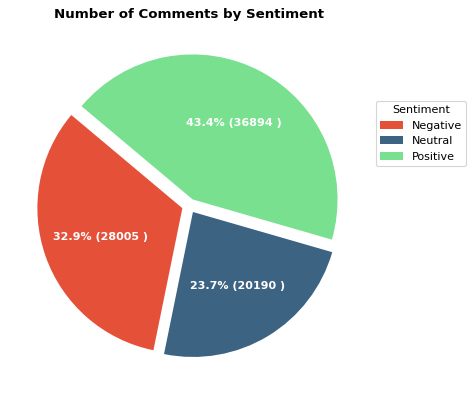

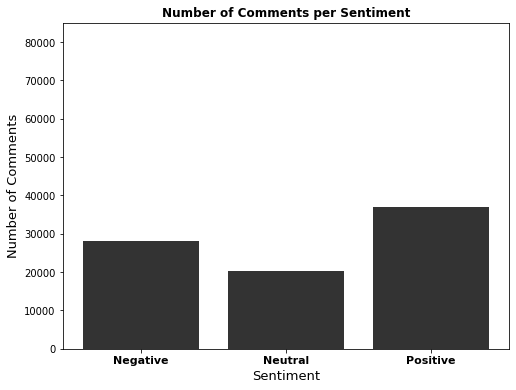

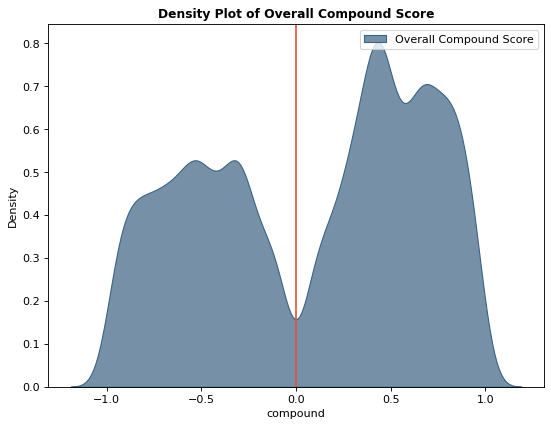

In [45]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [df.sentiment.value_counts()[-1], df.sentiment.value_counts()[0], df.sentiment.value_counts()[1]]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Comments by Sentiment", fontsize=12, fontweight="bold")
plt.show()

labels = ['Negative', 'Neutral', 'Positive']
freq = [df.sentiment.value_counts()[-1], df.sentiment.value_counts()[0], df.sentiment.value_counts()[1]]
index = np.arange(len(freq))

plt.figure(figsize=(8,6))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Sentiment', fontsize=13)
plt.ylabel('Number of Comments', fontsize=13)
plt.xticks(index, labels, fontsize=11, fontweight="bold")
plt.title('Number of Comments per Sentiment', fontsize=12, fontweight="bold")
plt.ylim(0, len(df['comments']))
plt.show()

# We remove the neutral compound scores to compare the negative and positive tweets
data = df[(df["sentiment"]!=0)]

# Draw Plot
plt.figure(figsize=(8,6), dpi= 80)
sns.kdeplot(data["compound"], shade=True, color="#3c6382", label="Overall Compound Score", alpha=.7)

# Decoration
plt.title('Density Plot of Overall Compound Score', fontsize=11, fontweight='bold')
plt.axvline(x=0, color='#e55039')
plt.legend()
plt.show()

                                             comments      id        date  \
1   Are there studies comparing masked spread indo...  np1rw6  2021-05-31   
7   It seems like variants are getting more transm...  np1rw6  2021-06-01   
8   What are the chances of getting long-term symp...  np1rw6  2021-05-31   
9   The CDC states that no one knows how long natu...  np1rw6  2021-06-01   
10  Should we expect the Sinovac vaccine, which is...  np1rw6  2021-06-02   

                                         tweet_text_p  negative  neutral  \
1   Are there studies comparing masked spread indo...     0.000    0.944   
7   It seems like variants are getting more transm...     0.000    0.924   
8   What are the chances of getting long-term symp...     0.045    0.804   
9   The CDC states that no one knows how long natu...     0.061    0.780   
10  Should we expect the Sinovac vaccine, which is...     0.000    0.873   

    positive  compound  sentiment  \
1      0.056    0.2263          1   
7     

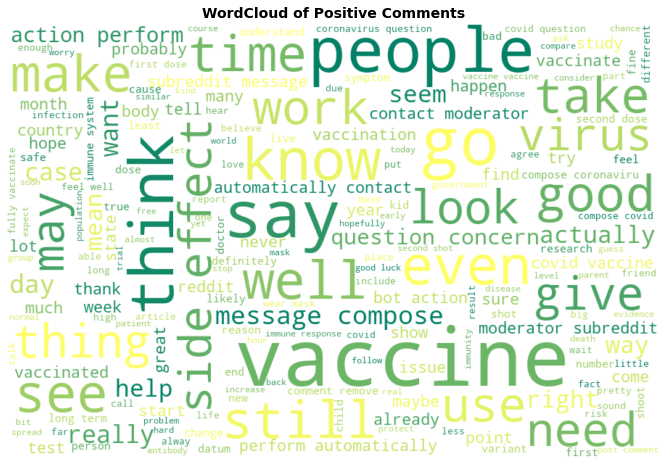

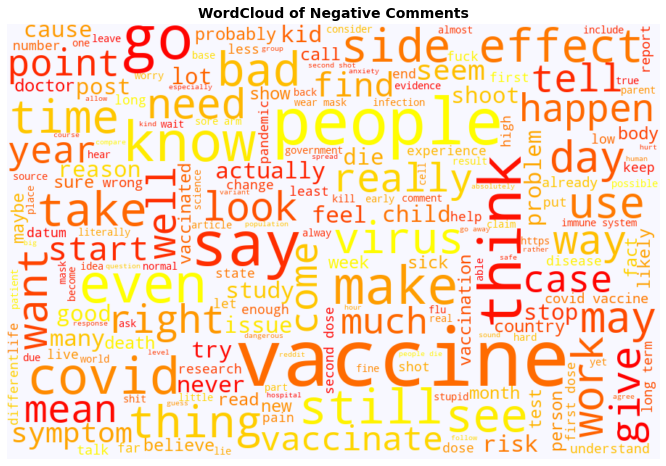

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                                            comments      id        date  \
0  Drug companies are trying to make them even be...  np5ybz  2021-05-31   
1  >I read one might still get Covid after the va...  lcesa3  2021-02-04   
2  If you mix politics and science, you get polit...  nnhqb2  2021-05-29   
3  ( Also, on my screen it says the links are her...  kgd3na  2020-12-19   
4  >nor the fact that the vitamin D is given in a...  kck33y  2020-12-16   
5    \nOne of the terms using "monkey" was to be ...  nmhc2v  2021-05-27   
6  I've done extensive research on this mainly be...  lt3gj0  2021-03-15   
7  Was Russia behind the black PR of the AstraZen...  nmhc2v  2021-05-27   
8  I just had my first shot on Wednesday afternoo...  n23y84  2021-05-01   
9  This. Similar to how people will leave reviews...  n4a9zi  2021-05-04   

                                        tweet_text_p  negative  neutral  \
0  Drug companies are trying to make them even be...     0.038    0.851   
1  >I read on

In [46]:
def lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent))
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return tweets_out
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
df['lemmatized'] = lemmatization(df['tokens_no_stop'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
df.drop(['tokens_no_stop'], axis=1, inplace=True)
df_pos = df[df['sentiment']==1]
df_neg = df[df['sentiment']==(-1)]
print(df_pos.head())

###
#Wordcloud
# Join the tweet back together
def rejoin_words(row):
    words = row['lemmatized']
    joined_words = (" ".join(words))
    return joined_words

all_words_pos = ' '.join([text for text in df_pos.apply(rejoin_words, axis=1)])
all_words_neg = ' '.join([text for text in df_neg.apply(rejoin_words, axis=1)])
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='white',
                      max_words=200,colormap='summer').generate(all_words_pos)

plt.figure(figsize=(12, 8))
plt.title('WordCloud of Positive Comments', fontsize=14, fontweight="bold")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='ghostwhite',
                      max_words=200,colormap='autumn').generate(all_words_neg)

plt.figure(figsize=(12, 8))
plt.title('WordCloud of Negative Comments', fontsize=14, fontweight="bold")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# 10 Most positive Tweets
df_pos.sort_values('compound', inplace=True, ascending=False)
df_pos.reset_index(drop=True, inplace=True)
print(df_pos.head(10))

# 10 Most Negative Tweets
df_neg.sort_values('compound', inplace=True)
print(df_neg.reset_index(drop=True).head(10))

df.drop(['tweet_text_p', 'lemmatized'], axis=1, inplace=True)
print(df.head())
df.to_pickle('REDDITSentiments.pkl')